In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# --- 1. Data Fetching ---

In [5]:
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    hist_data = stock.history(start=start_date, end=end_date)
    if hist_data.empty:
        print(f"No data found for {ticker} from {start_date} to {end_date}")
        return None
    print(f"Successfully fetched data for {ticker}")
    return hist_data

In [6]:
# --- 2. Basic Data Analysis ---

In [7]:
def calculate_daily_returns(data):
    """Calculates daily percentage returns."""
    data['Daily_Return'] = data['Close'].pct_change()
    return data

In [8]:
def calculate_moving_average(data, window_size):
    """Calculates a simple moving average."""
    data[f'SMA_{window_size}'] = data['Close'].rolling(window=window_size).mean()
    return data

In [9]:
# --- 3. Visualization --

In [10]:
def plot_closing_price(data, ticker_symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price')
    if f'SMA_20' in data.columns: # Check if SMA columns exist
         plt.plot(data['SMA_20'], label='20-Day SMA')
    if f'SMA_50' in data.columns:
         plt.plot(data['SMA_50'], label='50-Day SMA')
    plt.title(f'{ticker_symbol} Closing Price & Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def plot_daily_returns_histogram(data, ticker_symbol):
    plt.figure(figsize=(10, 6))
    data['Daily_Return'].hist(bins=50, alpha=0.75)
    plt.title(f'{ticker_symbol} Daily Returns Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show() 

In [12]:
# --- Main Execution ---

Successfully fetched data for AAPL

--- Sample Data with Analysis ---
                                 Open        High         Low       Close  \
Date                                                                        
2023-12-22 00:00:00-05:00  193.761082  193.989420  191.567156  192.192581   
2023-12-26 00:00:00-05:00  192.202472  192.480435  191.428144  191.646545   
2023-12-27 00:00:00-05:00  191.090614  192.093265  189.700782  191.745804   
2023-12-28 00:00:00-05:00  192.728610  193.244834  191.765661  192.172684   
2023-12-29 00:00:00-05:00  192.490361  192.986726  190.336138  191.130325   

                             Volume  Dividends  Stock Splits  Daily_Return  \
Date                                                                         
2023-12-22 00:00:00-05:00  37122800        0.0           0.0     -0.005547   
2023-12-26 00:00:00-05:00  28919300        0.0           0.0     -0.002841   
2023-12-27 00:00:00-05:00  48087700        0.0           0.0      0.000518   


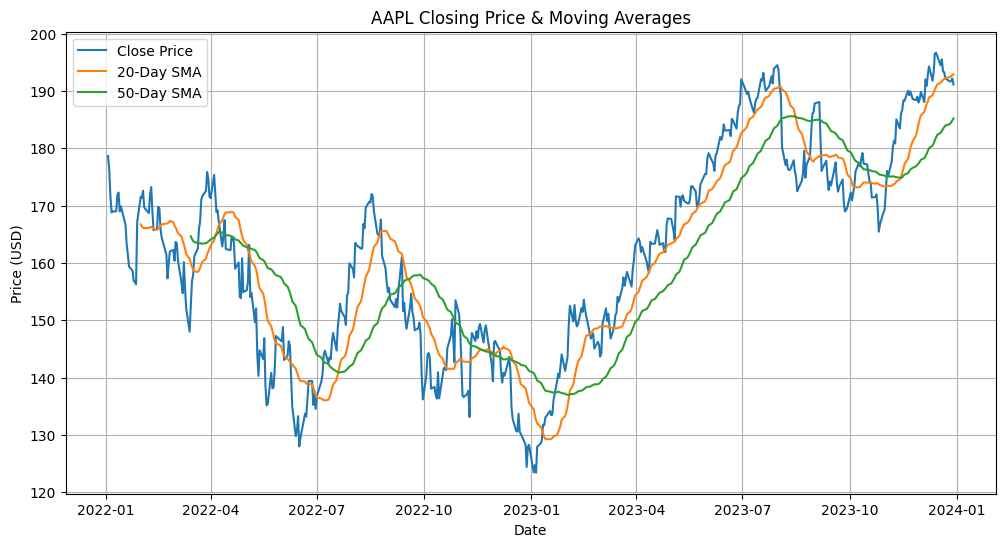

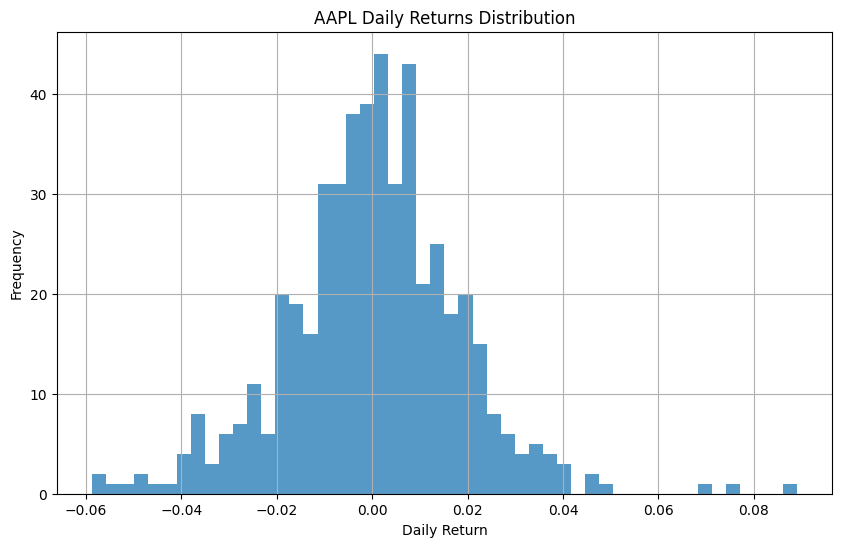


Analysis complete for AAPL. Plots generated.


In [13]:
if __name__ == "__main__":
    # Configuration
    TICKER_SYMBOL = 'AAPL'  # Example: Apple Inc.
    START_DATE = '2022-01-01'
    END_DATE = '2023-12-31'
    SHORT_WINDOW = 20
    LONG_WINDOW = 50

    # Fetch data
    stock_df = fetch_stock_data(TICKER_SYMBOL, START_DATE, END_DATE)

    if stock_df is not None:
        # Perform analysis
        stock_df = calculate_daily_returns(stock_df)
        stock_df = calculate_moving_average(stock_df, SHORT_WINDOW)
        stock_df = calculate_moving_average(stock_df, LONG_WINDOW)

        # Display some results (optional, good for notebooks)
        print("\n--- Sample Data with Analysis ---")
        print(stock_df.tail())

        print("\n--- Descriptive Statistics for Daily Returns ---")
        print(stock_df['Daily_Return'].describe())

        # Create plots
        plot_closing_price(stock_df, TICKER_SYMBOL)
        plot_daily_returns_histogram(stock_df, TICKER_SYMBOL)

        print(f"\nAnalysis complete for {TICKER_SYMBOL}. Plots generated.")
    else:
        print("Exiting due to data fetching issues.")